In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [39]:
def load_and_convert_to_grayscale(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from {image_path}")
        return None
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def roberts_edge_detection(gray_image):
    kernel_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
    kernel_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)
    gx = cv2.filter2D(gray_image, -1, kernel_x)
    gy = cv2.filter2D(gray_image, -1, kernel_y)
    return cv2.addWeighted(cv2.convertScaleAbs(gx), 0.5,
                           cv2.convertScaleAbs(gy), 0.5, 0)

def prewitt_edge_detection(gray_image):
    kernel_x = np.array([[1, 0, -1],
                         [1, 0, -1],
                         [1, 0, -1]], dtype=np.float32)
    kernel_y = np.array([[1, 1, 1],
                         [0, 0, 0],
                         [-1, -1, -1]], dtype=np.float32)
    gx = cv2.filter2D(gray_image, -1, kernel_x)
    gy = cv2.filter2D(gray_image, -1, kernel_y)
    return cv2.addWeighted(cv2.convertScaleAbs(gx), 0.5,
                           cv2.convertScaleAbs(gy), 0.5, 0)

def sobel_edge_detection(gray_image):
    gx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    gy = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = cv2.sqrt(gx**2 + gy**2)
    return cv2.convertScaleAbs(magnitude)

def canny_edge_detection(gray_image):
    return cv2.Canny(gray_image, 100, 200)

In [40]:
def detect_circles_from_edge_gray(edge_gray):
    # edge_gray เป็นภาพ gray อยู่แล้ว
    blur = cv2.GaussianBlur(edge_gray, (9, 9), 1.5)

    circles = cv2.HoughCircles(
        blur,
        cv2.HOUGH_GRADIENT,
        dp=1.2,
        minDist=60,
        param1=100,
        param2=30,
        minRadius=25,
        maxRadius=40
    )
    return circles

def draw_circles(original_img, circles):
    result = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    count = 0

    if circles is not None:
        circles = np.uint16(np.around(circles))
        count = len(circles[0])
        for x, y, r in circles[0]:
            cv2.circle(result, (x, y), r, (255, 0, 0), 2)
            cv2.circle(result, (x, y), 3, (0, 255, 0), -1)

    return result, count

# =======================
# Process Image (ตัวเดียว)
# =======================

def process_compare_edge_gray_and_circle(image_path):
    gray = load_and_convert_to_grayscale(image_path)
    if gray is None:
        return

    original = cv2.imread(image_path)

    edges = {
        "Roberts": roberts_edge_detection(gray),
        "Prewitt": prewitt_edge_detection(gray),
        "Sobel": sobel_edge_detection(gray),
        "Canny": canny_edge_detection(gray)
    }

    plt.figure(figsize=(12, 16))
    row = 1

    for name, edge_gray in edges.items():
        # Hough Circle จาก gray edge
        circles = detect_circles_from_edge_gray(edge_gray)
        circle_img, count = draw_circles(original, circles)

        # ซ้าย: Gray Edge
        plt.subplot(4, 2, row * 2 - 1)
        plt.imshow(edge_gray, cmap="gray")
        plt.title(f"{name} Edge (Gray)")
        plt.axis("off")

        # ขวา: Circle Result
        plt.subplot(4, 2, row * 2)
        plt.imshow(circle_img)
        plt.title(f"{name} → Circle (Count = {count})")
        plt.axis("off")

        row += 1

    plt.suptitle(os.path.basename(image_path), fontsize=16)
    plt.tight_layout()
    plt.show()

Processing: C:\Users\kawayi\Documents\GitHub\long\Mini_Visionv1\img\picture3.jpg


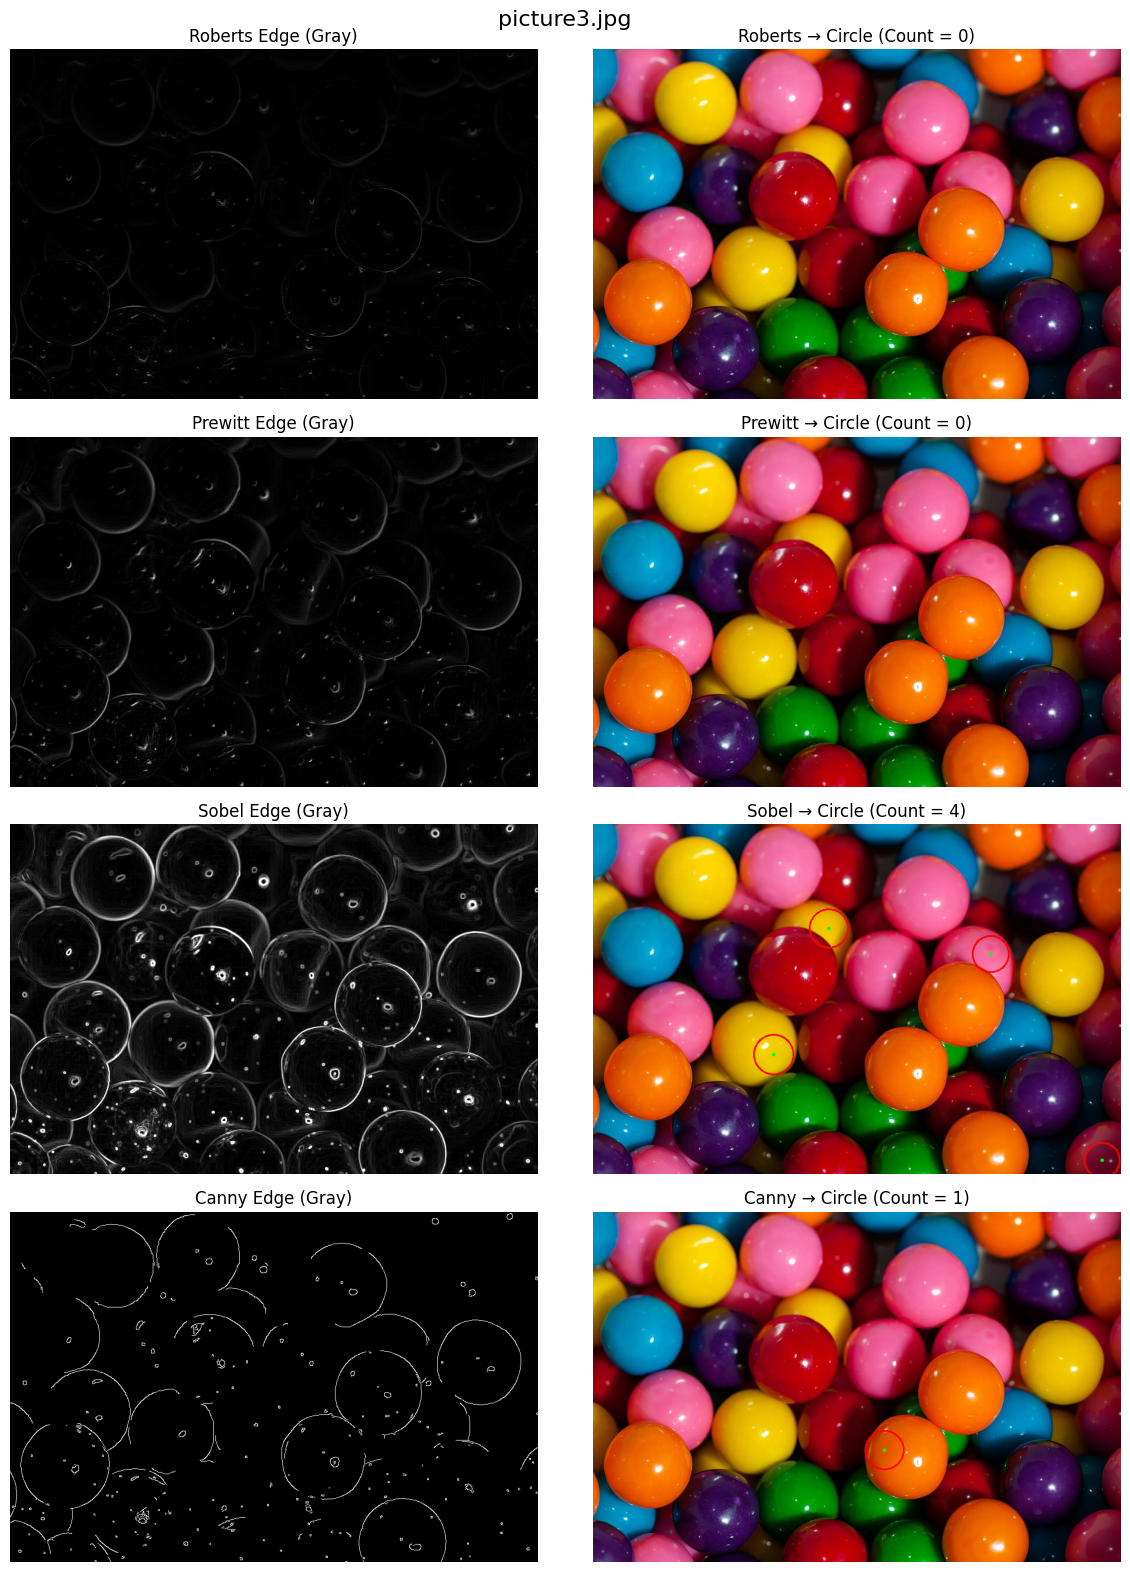

Processing: C:\Users\kawayi\Documents\GitHub\long\Mini_Visionv1\img\pic_circle1.jpg


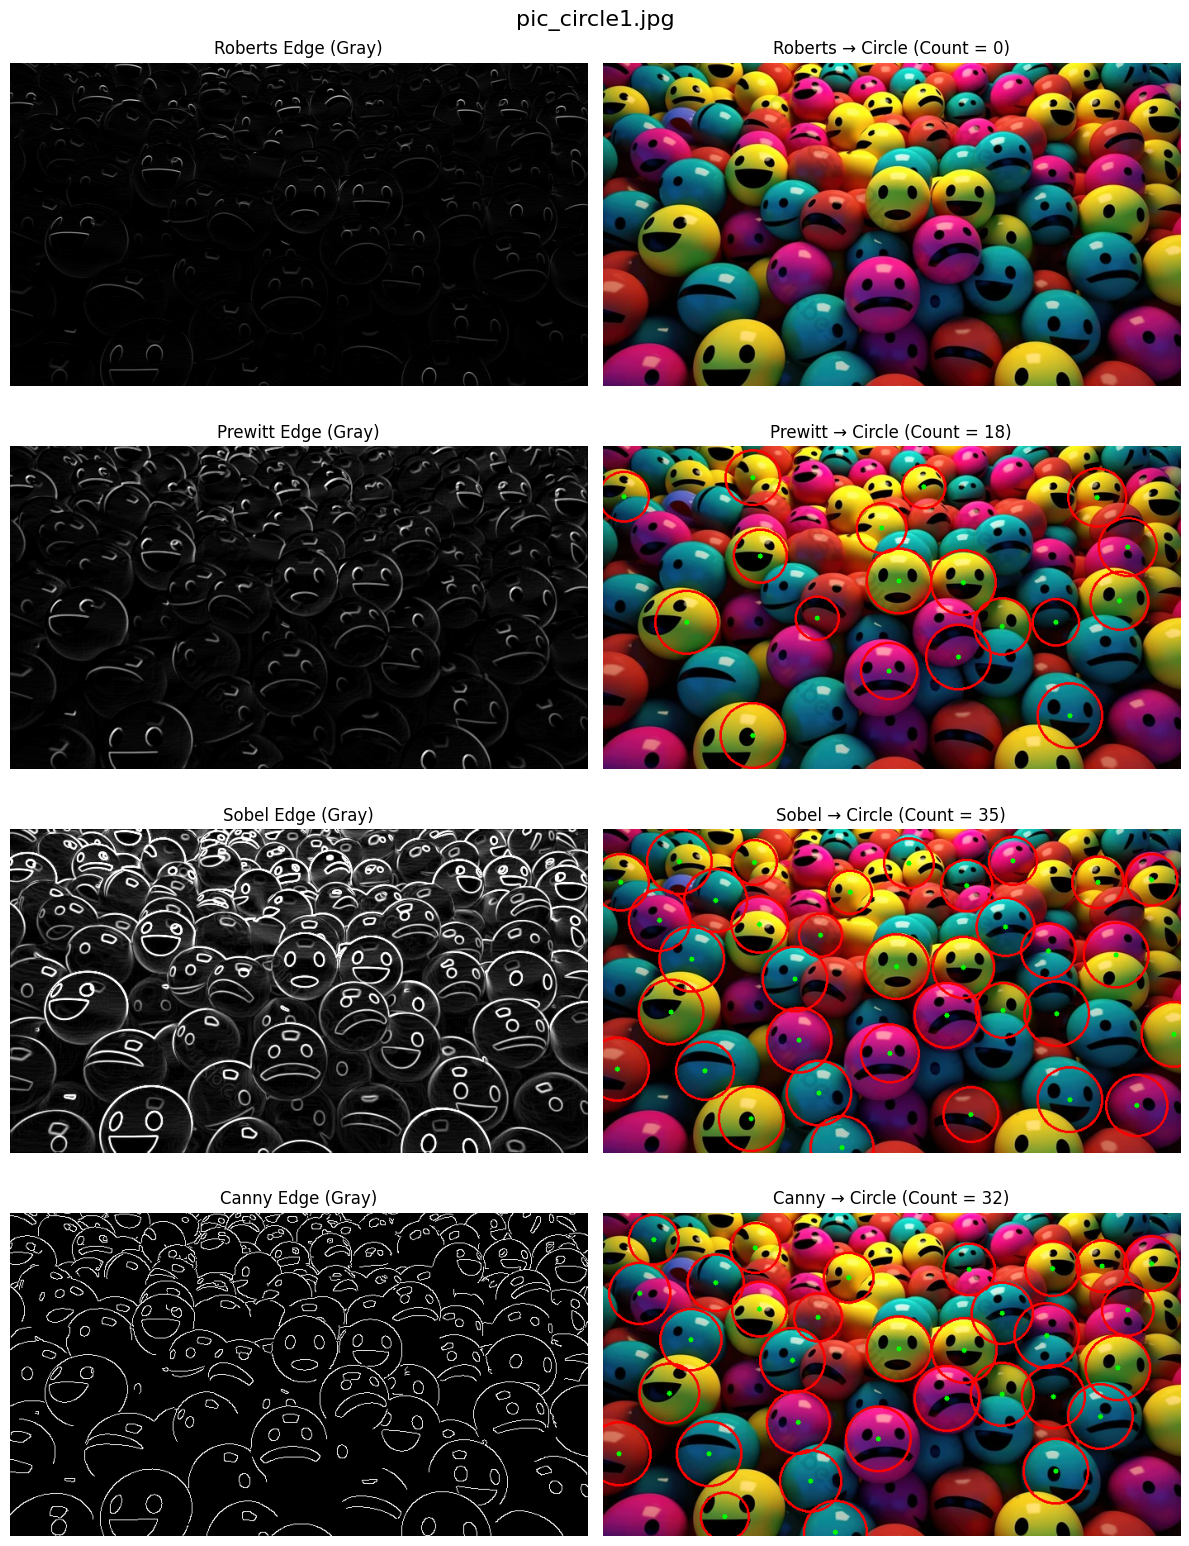

Processing: C:\Users\kawayi\Documents\GitHub\long\Mini_Visionv1\img\Pic_circle2.jpg


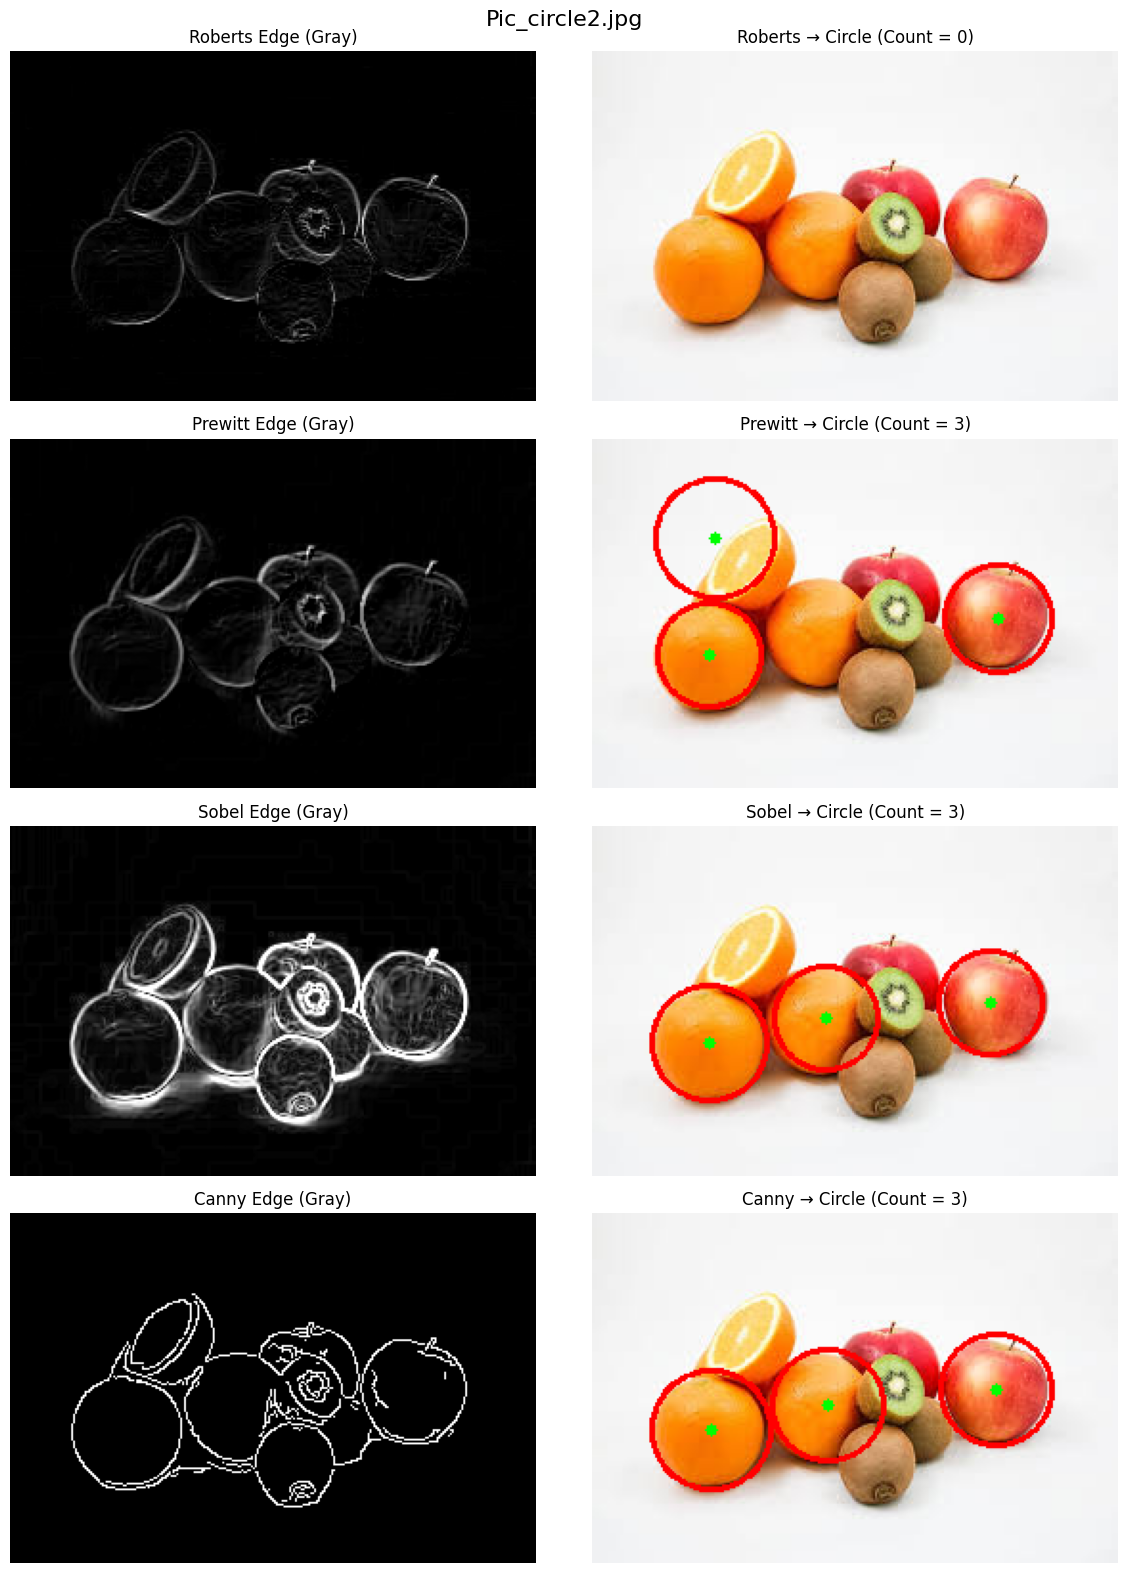

In [ ]:
INPUT_PATH = "img\picture3.jpg"
INPUT_PATH_CIRCLE1 = "img\pic_circle1.jpg"
INPUT_PATH_CIRCLE2 = "img\Pic_circle2.jpg"

def main():
    
    targets = [
        INPUT_PATH,
        INPUT_PATH_CIRCLE1,
        INPUT_PATH_CIRCLE2
    ]

    for target in targets:
        if not os.path.exists(target):
            print(f"Path not found: {target}")
            continue

        print(f"Processing: {target}")
        process_compare_edge_gray_and_circle(target)

if __name__ == "__main__":
    main()
